In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [52]:
start = '2021-01-01'
end = '2024-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [53]:
data.reset_index(inplace=True)

In [54]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2021-01-04,86.004646,87.617506,84.989952,87.462736,38038000
1,2021-01-05,86.635651,86.971561,85.495801,85.843405,22906000
2,2021-01-06,86.355484,86.987986,84.549531,84.730179,52042000
3,2021-01-07,88.941238,88.998462,86.443069,86.592857,45300000
4,2021-01-08,89.934525,90.065405,88.258716,88.977563,41012000
...,...,...,...,...,...,...
994,2024-12-16,197.934509,200.411683,193.889115,194.143830,32248600
995,2024-12-17,196.895676,202.649131,196.466172,198.304075,24129500
996,2024-12-18,189.933609,198.463899,189.064604,196.606015,27638400


In [55]:
ma_100_days = data.Close.rolling(100).mean()

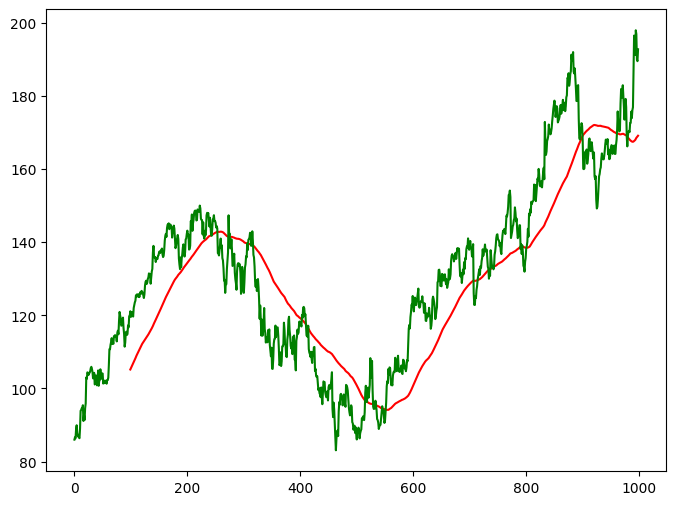

In [56]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [57]:
ma_200_days = data.Close.rolling(200).mean()

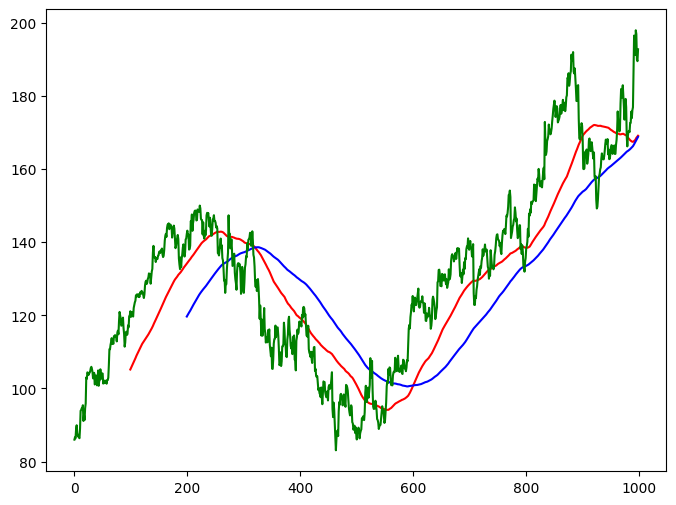

In [58]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [59]:
data.dropna(inplace=True)

In [60]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [83]:
data_train.shape[0]

799

In [62]:
data_test.shape[0]

200

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [64]:
data_train_scale = scaler.fit_transform(data_train)

In [65]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [66]:
x, y = np.array(x), np.array(y)

In [67]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential


In [68]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\ASUS\Desktop\my\stock\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [69]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [70]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 0.2108
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0587
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0279
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0201
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0177
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0181
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0185
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0151
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0159
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0138
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 0.0161
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0133
Epoch 13/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0152
Epoch 14/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0147
Epoch 15/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0152
Epoc

In [71]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [72]:
pas_100_days = data_train.tail(100)

In [73]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [74]:
data_test_scale  =  scaler.fit_transform(data_test)

In [75]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [76]:
y_predict = model.predict(x)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step


In [77]:
scale =1/scaler.scale_

In [78]:
y_predict = y_predict*scale

In [79]:
y = y*scale

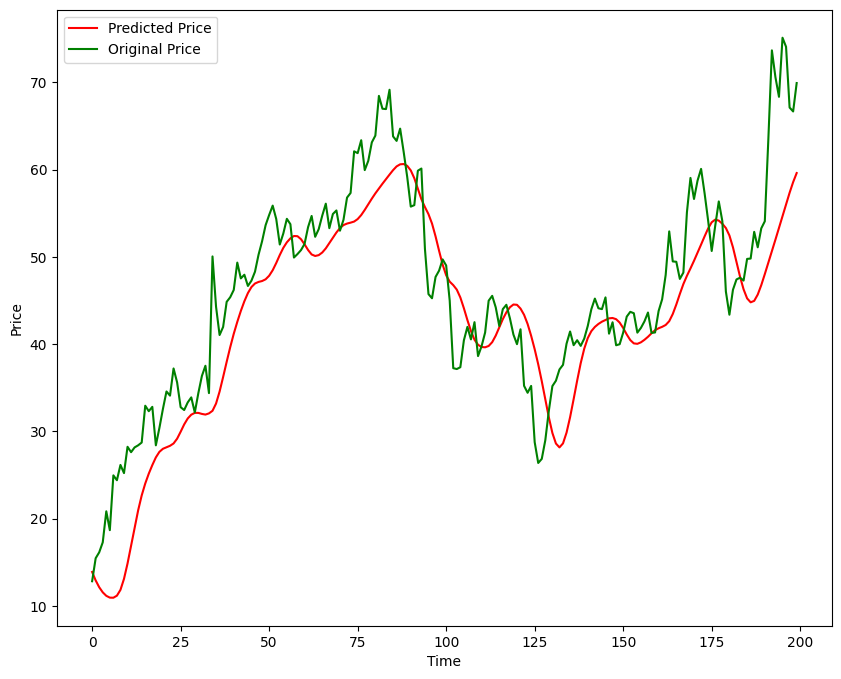

In [80]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [81]:
model.save('Stock Predictions Model.keras')